# Analyze and processing

## 1. Time to Frequency converting

Previously, we were having fun creating different kind of waves and learned that sine wave is pretty much a component of any signal.

Now, if we have an arbitrary complex signal, can we decompose it into sine wave? Can we invert the addition process?

Yes, we can... well, most of the time. 

To decompose the signal, the common use algorithm is `fourier transform`. [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html#fourier-transforms-scipy-fft)

### 1.1 Fourier Transform

Named after Jean Baptiste Joseph Fourier (1768–1830) [link](https://www.embs.org/pulse/articles/highlights-in-the-history-of-the-fourier-transform/#:~:text=Surprisingly%2C%20this%20method%20for%20derivation,institute%20in%201811%20%5B11%5D.)

For visual interpretation: [Youtube](https://www.youtube.com/watch?v=spUNpyF58BY)

<u>My attempt</u>

To me, start by understanding Fourier Series helps me to understand Fourier Transform.

#### Fourier Series

[quote](https://en.wikipedia.org/wiki/Fourier_series#:~:text=A%20Fourier%20series%20(%2F%CB%88f,be%20determined%20using%20harmonic%20analysis.)
> A Fourier series (/ˈfʊrieɪ, -iər/[1]) is a sum that represents a periodic function as a sum of sine and cosine waves. The frequency of each wave in the sum, or harmonic, is an integer multiple of the periodic function's fundamental frequency. Each harmonic's phase and amplitude can be determined using harmonic analysis. 

The key is for any signal that is periodic, the Fourier Series can represent it. 

Periodic signal is a signal that repeat after some period of time. A sum of periodic signal is periodic.

Period signal satisfy the next properties.
$$ x(t) == x(t + T_0) $$
$T_0$ is a period. 

The equation mean, there is signal *x* which is a function of time *t*. $T_0$ is some number. If this signal *x* repeats every 5 second ($T_0 = 5$) then x[0] == x[0 + 5], x[1] == x[1 + 5], ...

Every signal we have seen in the previous lecture/lab is periodic signal.

Thus, the sum of periodic signal is represented with a sum of sine and cosine at different frequencies, amplitudes, and phases.

The example of fourier series are all the wave in the previous lecture.

$$
x(t) = \frac{4}{\pi} \sum_{k=1}^{\infty} \frac{1}{2 k - 1} \sin \left( 2 \pi \left(2 k - 1 \right) t \right)
$$

Here is the square wave equation, we know right away that the square wave consists of odd harmonics. If we refactor the equation into a series of sum, it will look like this.

$$ 
x(t) = \frac{4}{\pi} \times ( \frac{\sin(2\pi t)}{1} + \frac{\sin(2\pi 3t)}{3} + \frac{\sin(2\pi 5t)}{5} + ... )
$$

For an easier to read formula, we encapulate the $2\pi t$ into $\omega$

$$ 
x(t) = \frac{4}{\pi} \times ( \frac{\sin(\omega)}{1} + \frac{\sin(3\omega)}{3} + \frac{\sin(5\omega)}{5} + ... )
$$

well, just to show you that it is a sum of sine wave. Thus, it is fourier transform.

##### Fourier Series General Form

Here is the general form of Fourier series.

$$
x(t) = a_0 + \sum_{n=1}^{\infty} a_n \cos(nt\frac{\pi}{L}) + \sum_{n=1}^{\infty} b_n \sin(nt\frac{\pi}{L})
$$

where *L* is half of the period and $a_0,a_n,b_n$ are the coefficient.

Here is the trick, all we have to find is the coefficient $a_0,a_n,b_n$ and here is how.

$$
a_0 = \frac{1}{2L} \int_{-L}^{L} x(t) dt
$$

$$
a_n = \frac{1}{L} \int_{-L}^{L} x(t) \cos(nt\frac{\pi}{L}) dt
$$

$$
b_n = \frac{1}{L} \int_{-L}^{L} x(t) \sin(nt\frac{\pi}{L}) dt
$$

Don't get scared by the integration yet. My point is, to find the coefficient, we only consider 1 cycle. For mathematic nerd, continue to read [this](https://www.mathsisfun.com/calculus/fourier-series.html)



#### Fourier Transform

Not every signal is periodic. In fact, most of the signals are aperiodic. What is aperiodic signal? It is a signal that never repeats itself (yet).

$$ \forall{T_{0}} (x(t) != x(t + T_0)) $$

In human word, you can not find and number of $T_0$ that makes $x[t] == x[t + T_0]$ for all *t*. Or, there is no period.



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
plt.style.use('seaborn-whitegrid')

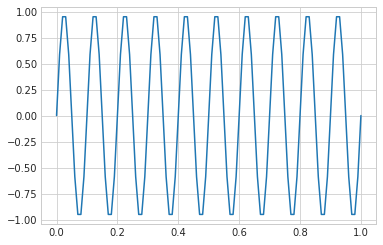

In [33]:
fs = 100
t = np.arange(start=0, stop=1+ 1/fs, step=1/fs)
x = np.sin(2 * np.pi * 10 * t + 0)

plt.plot(t,x)
plt.show()

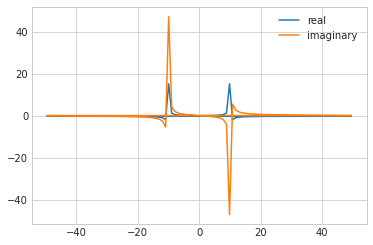

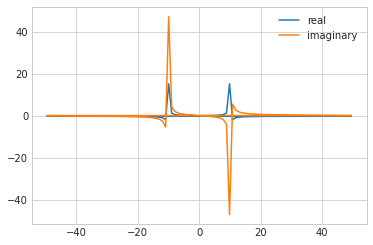

In [34]:
x_f = np.fft.fft(x)
freq_range = np.fft.fftfreq(len(t), 1/fs)
plt.plot(freq_range, x_f.real, label='real')
plt.plot(freq_range, x_f.imag, label='imaginary')
plt.legend()
plt.show()


x_f = scipy.fft.fft(x)
freq_range = scipy.fft.fftfreq(len(t), 1/fs)
plt.plot(freq_range, x_f.real, label='real')
plt.plot(freq_range, x_f.imag, label='imaginary')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


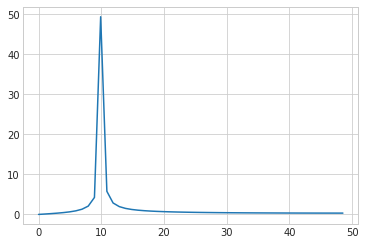

In [35]:
x = np.sin(2 * np.pi * 10 * t + 0)
x_f = scipy.fft.fft(x)
x_f = np.abs(x_f[0:len(t)//2])
freq_range = scipy.fft.fftfreq(len(t), 1/fs)[:len(t)//2]

plt.plot(freq_range, x_f)
plt.legend()
plt.show()

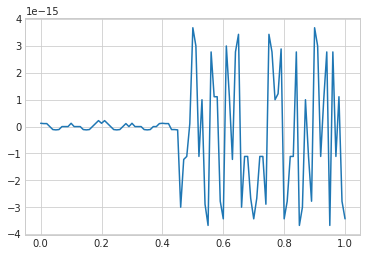

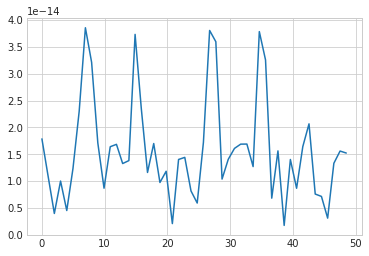

In [50]:
x = np.sin(2 * np.pi * 10 * t + 0) + np.sin(2 * np.pi * 10 * t + np.deg2rad(180))

plt.plot(t,x)
plt.show()
x_f = scipy.fft.fft(x)
x_f = np.abs(x_f[0:len(t)//2])
freq_range = scipy.fft.fftfreq(len(t), 1/fs)[:len(t)//2]

plt.plot(freq_range, x_f)
plt.show()

x_f = scipy.fft.fft(x)
freq_range = scipy.fft.fftfreq(len(t), 1/fs)
plt.plot(freq_range, x_f.real, label='real')
plt.plot(freq_range, x_f.imag, label='imaginary')
plt.legend()
plt.show()